# Testing CMD selection in combination with other methods

In [1]:
# imports
# imports 

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from astropy.io import fits
from astropy.table import Table, vstack
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, Galactocentric, ICRS
from astropy.constants import kpc, au
from astropy.coordinates import CartesianRepresentation, CartesianDifferential
from astropy.coordinates.matrix_utilities import rotation_matrix, matrix_product, matrix_transpose
from numba import njit

import random
import healpy as hp

from matplotlib.gridspec import GridSpec
from scipy.optimize import minimize


# Add the path to the 'scripts' folder directly
sys.path.append('/Users/mncavieres/Documents/2024-2/HVS')


# Now you can import from the 'scripts' package
from scripts.implied_d_vr import *  # Or import any other module
from scripts.selections import *
from scripts.CMD_selection import *

In [2]:
# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})


In [3]:
# load catalogs
# save the catalogs
data_gaia_big= pd.read_feather('/Users/mncavieres/Documents/2024-2/HVS/Data/Gaia_tests/CMD_selection_testing_catalog/large_catalog.feather')

In [4]:
total_hvs_sample = len(data_gaia_big.loc[data_gaia_big['is_hvs'] == 1])

# Apply entire processing for the data

In [5]:

ratio_hist, x_bins, y_bins = compute_CMD_hvs_ratio(data_gaia_big)

Z_smooth, X_grid, Y_grid = smooth_histogram(ratio_hist, x_bins, y_bins)

Z_smooth_oversampled, X_grid_new, Y_grid_new, _, _ = oversample_histogram(Z_smooth, x_bins, y_bins)

contour_lines, contour_levels = make_contours(Z_smooth_oversampled, X_grid_new, Y_grid_new)

filtered_df_test = filter_points_within_contour(contour_lines, data_gaia_big, level = contour_lines.levels[-2])
plt.clf()
plt.close()

In [6]:
precision_cmd = len(filtered_df_test.loc[filtered_df_test['is_hvs'] == True])/len(filtered_df_test)
print('Number of stars within the contour: ', len(filtered_df_test))
print('Precision of the selection:', len(filtered_df_test.loc[filtered_df_test['is_hvs'] == True])/len(filtered_df_test))

Number of stars within the contour:  3737
Precision of the selection: 0.9836767460529837


/var/folders/__/n140hqf972zfmtt1hs5ldglw0000gn/T/ipykernel_47787/2869798945.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right', markerscale = 15)


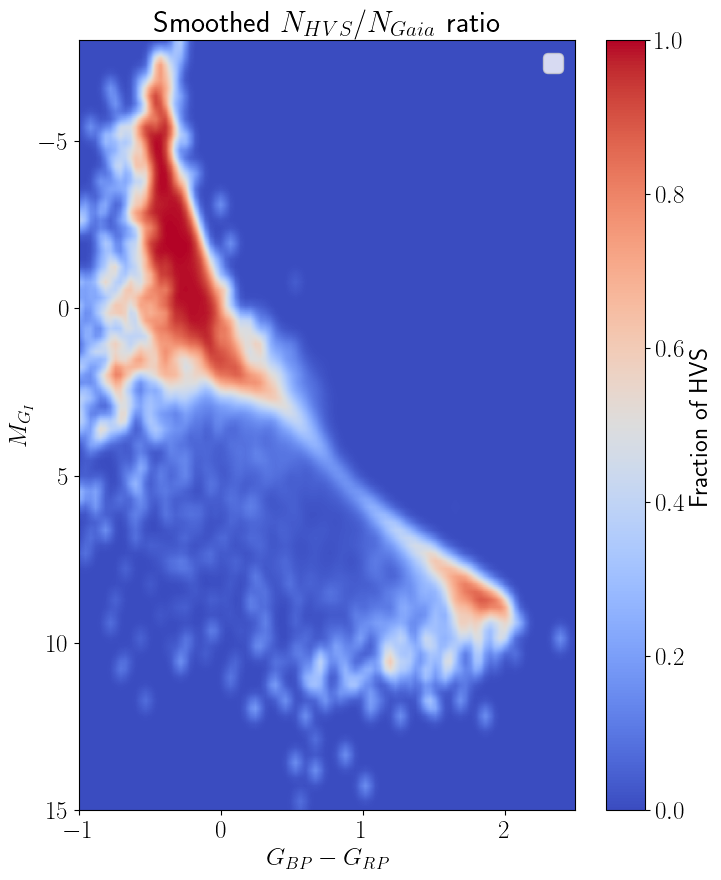

In [7]:
# plot the oversampled histogram
# Define levels for the contour
#contour_levels = np.linspace(Z_smooth_oversampled.min(), Z_smooth_oversampled.max(), 10)

# Create figure
plt.figure(figsize=(8, 10))

# # Plot the scatter data (optional)
# #plt.scatter(
#     data_gaia_big['bp_rp_corr'], data_gaia_big['implied_M_g_corr'],
#     s=0.1, alpha=0.3, color='gray', label='Gaia stars'
# )
# plt.scatter(
#     filtered_df_test['bp_rp_corr'], filtered_df_test['implied_M_g_corr'],
#     s=0.1, color='darkorange', alpha=0.3, label='HVS candidates'
# )

cmap_name = 'coolwarm' #'viridis'

# # Generate the contour plot from the oversampled, smoothed data
# contour_lines = plt.contour(
#     X_grid_new, Y_grid_new, Z_smooth_oversampled,
#     levels=contour_levels, cmap=cmap_name, vmin=0, vmax=1
#)
extent = [x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]
plt.imshow(Z_smooth_oversampled, extent=extent, origin='lower', aspect='auto', cmap=cmap_name, vmin=0, vmax=1)

# Add a colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm=norm, cmap=cmap_name)

# make legend handles big


plt.colorbar(sm, label='Fraction of HVS', ax=plt.gca())
plt.xlim(-1, 2.5)
plt.ylim(15, -8)
plt.xlabel('$G_{BP} - G_{RP}$')
plt.ylabel('$M_{G_I}$')
plt.title('Smoothed $N_{HVS}$/$N_{Gaia}$ ratio')
plt.legend(loc = 'upper right', markerscale = 15)
plt.show()



## Plot the resulting selection

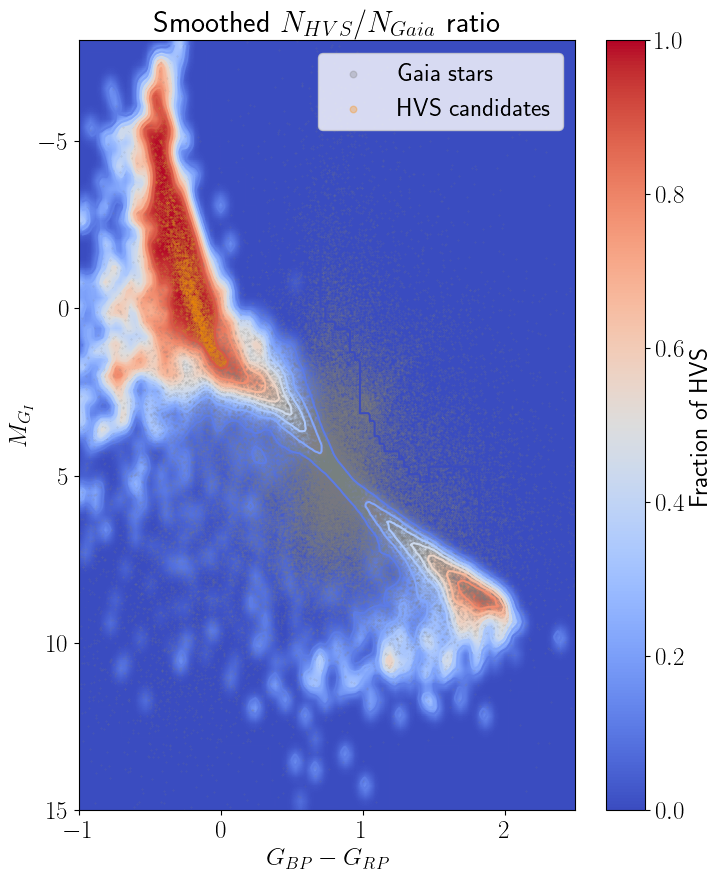

In [8]:
# Define levels for the contour
contour_levels = np.linspace(Z_smooth_oversampled.min(), Z_smooth_oversampled.max(), 10)

# Create figure
plt.figure(figsize=(8, 10))

# Plot the scatter data (optional)
plt.scatter(
    data_gaia_big['bp_rp_corr'], data_gaia_big['implied_M_g_corr'],
    s=0.1, alpha=0.3, color='gray', label='Gaia stars'
)
plt.scatter(
    filtered_df_test['bp_rp_corr'], filtered_df_test['implied_M_g_corr'],
    s=0.1, color='darkorange', alpha=0.3, label='HVS candidates'
)

cmap_name = 'coolwarm'#'grey'#'viridis'

# Generate the contour plot from the oversampled, smoothed data
contour_lines = plt.contour(
    X_grid_new, Y_grid_new, Z_smooth_oversampled,
    levels=contour_levels, cmap=cmap_name, vmin=0, vmax=1
)
extent = [x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]
plt.imshow(Z_smooth_oversampled, extent=extent, origin='lower', aspect='auto', cmap=cmap_name, vmin=0, vmax=1)

# Add a colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm=norm, cmap=cmap_name)

# make legend handles big


plt.colorbar(sm, label='Fraction of HVS', ax=plt.gca())
plt.xlim(-1, 2.5)
plt.ylim(15, -8)
plt.xlabel('$G_{BP} - G_{RP}$')
plt.ylabel('$M_{G_I}$')
plt.title('Smoothed $N_{HVS}$/$N_{Gaia}$ ratio')
plt.legend(loc = 'upper right', markerscale = 15)
plt.show()



# Combined with parallax consistency

In [9]:
filtered_df_test

,ra,dec,bp_rp,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_error,pmra,pmra_error,...,VR,A_G,A_bp,A_rp,G_corr,phot_bp_mean_mag_corr,phot_rp_mean_mag_corr,bp_rp_corr,implied_M_g,implied_M_g_corr
1932486,69.366680,-68.570520,0.061852,20.196449,20.189674,20.127823,-0.709207,0.425506,0.396476,0.483668,...,2.135463e+02,0.200521,0.259770,0.152114,19.995929,19.929904,19.975709,-0.045805,0.685419,0.685419
2165622,266.647013,-21.530272,1.537758,20.358593,20.687746,19.149988,-1.177907,0.930041,-0.354000,1.251787,...,-5.841405e+04,3.079819,3.989840,2.336334,17.278774,16.697906,16.813654,-0.115747,0.699385,0.699385
1856902,171.907001,-16.992167,0.013935,17.862793,17.887136,17.873201,-0.222349,0.137699,-0.836464,0.114834,...,9.761790e+01,0.106073,0.137416,0.080467,17.756720,17.749721,17.792735,-0.043014,1.528984,1.528984
2323866,265.907877,-22.118461,1.502001,20.483688,20.237293,18.735292,-6.107503,2.128429,0.451894,1.910290,...,-9.186067e+06,3.555966,4.606678,2.697537,16.927723,15.630615,16.037755,-0.407140,-2.970950,-2.970950
1990108,72.908138,-68.458547,0.424437,19.925449,19.929331,19.504894,-0.471821,0.310992,0.761658,0.362645,...,4.661486e+02,0.769096,0.996347,0.583432,19.156353,18.932983,18.921462,0.011521,1.757507,1.757507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,210.201813,17.244253,-0.170238,16.478344,16.416840,16.587078,0.022876,0.045057,-1.677336,0.026133,...,1.495584e+03,0.077359,0.100217,0.058684,16.400985,16.316623,16.528394,-0.211771,-1.846919,-1.846919
13482,59.534751,-3.974717,0.000036,20.287153,20.281124,20.281088,0.010545,0.586619,0.534354,0.340239,...,3.158352e+03,0.373995,0.484502,0.283710,19.913158,19.796622,19.997377,-0.200756,0.283474,0.283474
13487,18.311326,-19.308168,-0.071829,19.515993,19.490547,19.562376,0.013422,0.312674,0.717380,0.181351,...,1.406942e+03,0.034430,0.044603,0.026118,19.481563,19.445945,19.536258,-0.090313,0.032559,0.032559
13501,188.737800,30.262224,-0.114538,18.754807,18.714190,18.828728,0.012147,0.176798,-0.888354,0.102543,...,2.879503e+03,0.049041,0.063531,0.037202,18.705766,18.650659,18.791525,-0.140867,-0.944310,-0.944310


In [10]:
filtered_df_test = filtered_df_test.loc[parallax_consistency(filtered_df_test['parallax'], 
                                                             filtered_df_test['parallax_error'],
                                                             filtered_df_test['implied_parallax'],
                                                             filtered_df_test['implied_parallax_error'])]

gaia_data_big_good_parallax = data_gaia_big.loc[parallax_consistency(data_gaia_big['parallax'],
                                                                    data_gaia_big['parallax_error'],
                                                                    data_gaia_big['implied_parallax'],
                                                                    data_gaia_big['implied_parallax_error'])] 

precision_parallax_cmd = len(filtered_df_test.loc[filtered_df_test['is_hvs'] == True])/len(filtered_df_test)

print('Number of HVS candidates:', len(filtered_df_test))
print('Precision of the selection:', precision_parallax_cmd)
print(f'The precision improved by {precision_parallax_cmd - precision_cmd}')

Number of HVS candidates: 3697
Precision of the selection: 0.9867460102786043
The precision improved by 0.0030692642256205938


# Where is S5-HVS1?

The most confirmed hypervelocity star is S5 HVS1 which has source id: 6513109241989477504

In [11]:
# get data for the star
s5_hvs1 = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/Gaia_tests/s5hvs1-result.fits')

s5_hvs1 = extinction_correction(s5_hvs1)

s5_hvs1 = implied_calculations(s5_hvs1)

s5_hvs1['implied_M_g_corr'] = compute_absolute_magntiude(s5_hvs1['G_corr'], 1000/s5_hvs1['implied_parallax'],[0])




Unit conversion error in plx and eplx


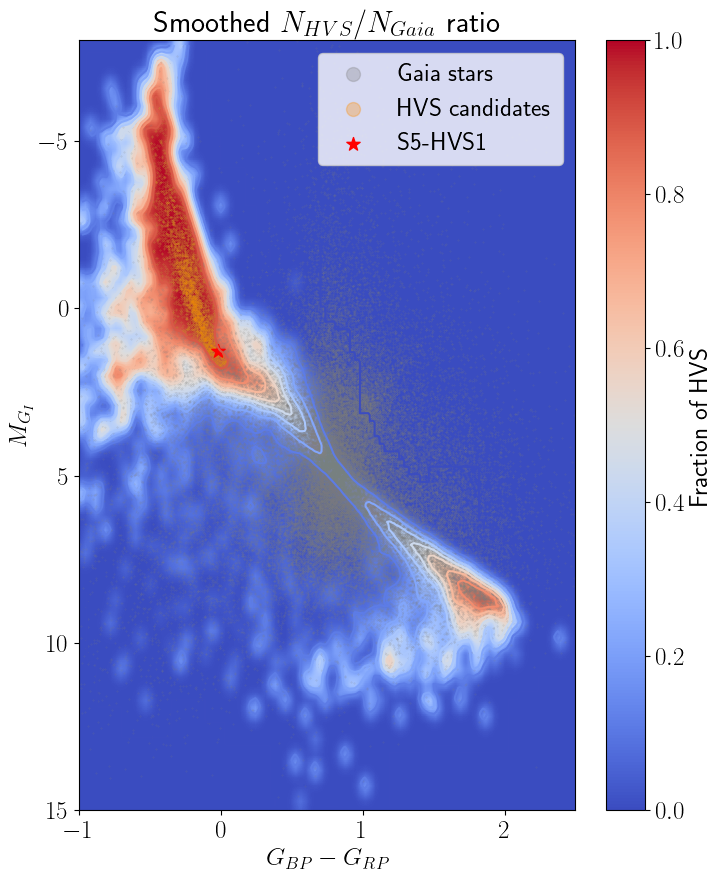

In [12]:
# plot the selection with S5-HVS1
# Define levels for the contour
contour_levels = np.linspace(Z_smooth_oversampled.min(), Z_smooth_oversampled.max(), 10)

# Create figure
plt.figure(figsize=(8, 10))

# Plot the scatter data (optional)
plt.scatter(
    gaia_data_big_good_parallax['bp_rp_corr'], gaia_data_big_good_parallax['implied_M_g_corr'],
    s=0.1, alpha=0.3, color='gray', label='Gaia stars'
)
plt.scatter(
    filtered_df_test['bp_rp_corr'], filtered_df_test['implied_M_g_corr'],
    s=0.1, color='darkorange', alpha=0.3, label='HVS candidates'
)

# plot S5 HVS1
plt.scatter(s5_hvs1['bp_rp_corr'], s5_hvs1['implied_M_g_corr'], s=100, color='red', label='S5-HVS1', marker='*')



cmap_name = 'coolwarm'

# Generate the contour plot from the oversampled, smoothed data
contour_lines = plt.contour(
    X_grid_new, Y_grid_new, Z_smooth_oversampled,
    levels=contour_levels, cmap=cmap_name, vmin=0, vmax=1
)
extent = [x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]
plt.imshow(Z_smooth_oversampled, extent=extent, origin='lower', aspect='auto', cmap=cmap_name, vmin=0, vmax=1)

# Add a colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm=norm, cmap=cmap_name)

# make legend handles big




plt.colorbar(sm, label='Fraction of HVS', ax=plt.gca())
plt.xlim(-1, 2.5)
plt.ylim(15, -8)
plt.xlabel('$G_{BP} - G_{RP}$')
plt.ylabel('$M_{G_I}$')
plt.title('Smoothed $N_{HVS}$/$N_{Gaia}$ ratio')
lgnd = plt.legend(loc = 'upper right', markerscale = 10)
for handle in lgnd.legend_handles:
    handle.set_sizes([100])



plt.show()



# Impose that parallax and ruwe are good

# $\omega / \sigma_{\omega } > 5$

In [13]:
filtered_df_test = filtered_df_test[good_parallax(np.abs(filtered_df_test['implied_parallax']), filtered_df_test['implied_parallax_error'])]

precision_parallax_cmd = len(filtered_df_test.loc[filtered_df_test['is_hvs'] == True])/len(filtered_df_test)

print('Number of HVS candidates:', len(filtered_df_test))
print('Precision of the selection:', precision_parallax_cmd)
print('Completeness of the HVS selection:', len(filtered_df_test)/total_hvs_sample)

Number of HVS candidates: 2023
Precision of the selection: 0.9980227385071676
Completeness of the HVS selection: 0.15613182063749326


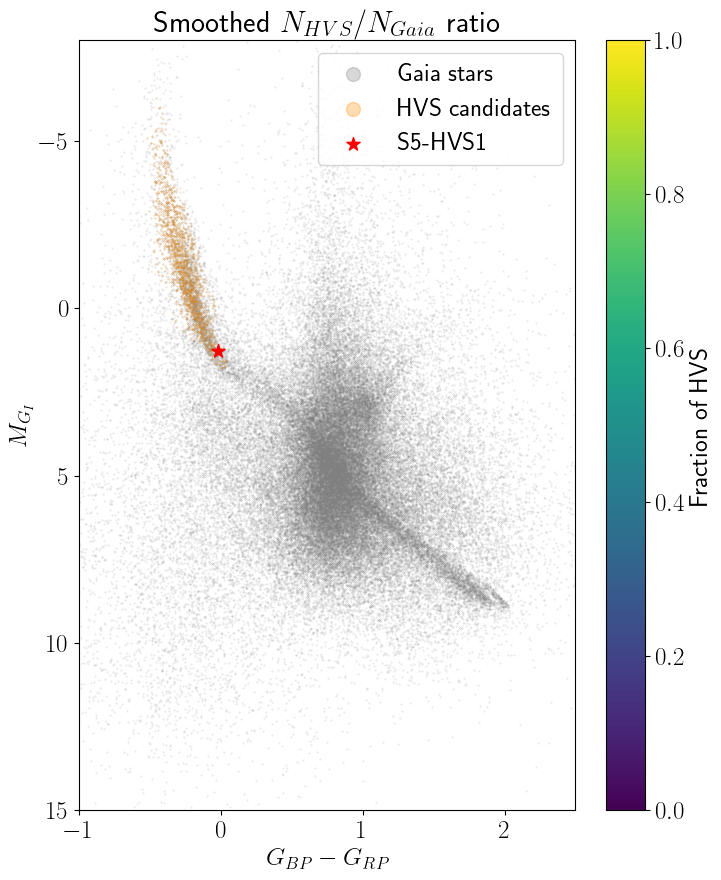

In [14]:
# plot the selection with S5-HVS1
# Define levels for the contour
contour_levels = np.linspace(Z_smooth_oversampled.min(), Z_smooth_oversampled.max(), 10)

# Create figure
plt.figure(figsize=(8, 10))

# Plot the scatter data (optional)
plt.scatter(
    data_gaia_big['bp_rp_corr'], data_gaia_big['implied_M_g_corr'],
    s=0.1, alpha=0.3, color='gray', label='Gaia stars'
)
plt.scatter(
    filtered_df_test['bp_rp_corr'], filtered_df_test['implied_M_g_corr'],
    s=0.1, color='darkorange', alpha=0.3, label='HVS candidates'
)

# plot S5 HVS1
plt.scatter(s5_hvs1['bp_rp_corr'], s5_hvs1['implied_M_g_corr'], s=100, color='red', label='S5-HVS1', marker='*')



cmap_name = 'viridis'

# # Generate the contour plot from the oversampled, smoothed data
# contour_lines = plt.contour(
#     X_grid_new, Y_grid_new, Z_smooth_oversampled,
#     levels=contour_levels, cmap=cmap_name, vmin=0, vmax=1
# )
# extent = [x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]
# plt.imshow(Z_smooth_oversampled, extent=extent, origin='lower', aspect='auto', cmap=cmap_name, vmin=0, vmax=1)

# Add a colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm=norm, cmap=cmap_name)

# make legend handles big




plt.colorbar(sm, label='Fraction of HVS', ax=plt.gca())
plt.xlim(-1, 2.5)
plt.ylim(15, -8)
plt.xlabel('$G_{BP} - G_{RP}$')
plt.ylabel('$M_{G_I}$')
plt.title('Smoothed $N_{HVS}$/$N_{Gaia}$ ratio')
lgnd = plt.legend(loc = 'upper right', markerscale = 10)
for handle in lgnd.legend_handles:
    handle.set_sizes([100])



plt.show()



## How can we also include RGB stars?

For some reason speedystar is not producing rgb stars, likely because as it is a very short time of the entire star lifetime, this stars are just not found there, as speedystar produces a relatively low number of stars. 

This does not mean that this stars do not exist. Just that it is not very likely to observe them in that evolutionary sequence. However, since they are brighter in that sequence, considering them will increase our volume significantly and therefore, the chance of finding a HVS.

The Hills mechanism will distribute a population of the galactic center around the entire galaxy. Therefore, the population that we are looking for is similar in star formation history to the S star cluster.  Could we simulate a population of S star cluster stars using the SFH and eject them randomly around the galaxy?